# Coronavirus Disease (COVID-19)

Data Source: https://github.com/owid/covid-19-data/tree/master/public/data/

# Import Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import warnings

# Options and Settings

In [23]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [24]:
filepath = os.path.join('datasets', 'owid-covid-data.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [25]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165175,ZWE,Africa,Zimbabwe,2022-02-24,234967.0,378.0,338.429,5390.0,2.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165176,ZWE,Africa,Zimbabwe,2022-02-25,235467.0,500.0,348.143,5392.0,2.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165177,ZWE,Africa,Zimbabwe,2022-02-26,235803.0,336.0,368.429,5393.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
165178,ZWE,Africa,Zimbabwe,2022-02-27,235803.0,0.0,350.143,5393.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [26]:
df.shape

(165180, 67)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165180 entries, 0 to 165179
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    165180 non-null  object 
 1   continent                                   155289 non-null  object 
 2   location                                    165180 non-null  object 
 3   date                                        165180 non-null  object 
 4   total_cases                                 162150 non-null  float64
 5   new_cases                                   162099 non-null  float64
 6   new_cases_smoothed                          160948 non-null  float64
 7   total_deaths                                144355 non-null  float64
 8   new_deaths                                  144509 non-null  float64
 9   new_deaths_smoothed                         144379 non-null  float64
 

In [28]:
df['date'] = pd.to_datetime(df['date'])                   # convert date to pandas datetime

In [29]:
df['day_name'] = df['date'].dt.day_name()                 # add name of the day
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,day_name
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,Monday
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,Tuesday
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,Wednesday
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,Thursday
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN,Friday


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165180 entries, 0 to 165179
Data columns (total 68 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    165180 non-null  object        
 1   continent                                   155289 non-null  object        
 2   location                                    165180 non-null  object        
 3   date                                        165180 non-null  datetime64[ns]
 4   total_cases                                 162150 non-null  float64       
 5   new_cases                                   162099 non-null  float64       
 6   new_cases_smoothed                          160948 non-null  float64       
 7   total_deaths                                144355 non-null  float64       
 8   new_deaths                                  144509 non-null  float64      

# Missing Data Exploration

In [31]:
df.isna().sum()                                           # over 50 % missing data in some columns

iso_code                                        0
continent                                    9891
location                                        0
date                                            0
total_cases                                  3030
                                            ...  
excess_mortality_cumulative_absolute       159484
excess_mortality_cumulative                159484
excess_mortality                           159484
excess_mortality_cumulative_per_million    159484
day_name                                        0
Length: 68, dtype: int64

Strategies for handling missing values: Using ffill()-forwardfill: according to the next observed value  OR bfill()-backfill: according to the last observed value 

In [32]:
df.bfill().isna().sum()                                   # 6126 rows still missing with the backward fill strategy

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
excess_mortality_cumulative_absolute       6126
excess_mortality_cumulative                6126
excess_mortality                           6126
excess_mortality_cumulative_per_million    6126
day_name                                      0
Length: 68, dtype: int64

In [33]:
df.ffill().isna().sum()                                   # 1487 rows missing with the forward fill strategy

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
excess_mortality_cumulative_absolute       1487
excess_mortality_cumulative                1487
excess_mortality                           1487
excess_mortality_cumulative_per_million    1487
day_name                                      0
Length: 68, dtype: int64

In [34]:
df_ffill = df.ffill()
df_ffill.isna().sum()

iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
excess_mortality_cumulative_absolute       1487
excess_mortality_cumulative                1487
excess_mortality                           1487
excess_mortality_cumulative_per_million    1487
day_name                                      0
Length: 68, dtype: int64

In [35]:
df_ffill.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.651800e+05,1.651800e+05,1.651750e+05,1.651520e+05,165152.000000,165152.000000,165180.000000,165180.000000,165175.000000,165152.000000,...,163697.000000,163697.000000,165180.000000,165180.000000,165180.000000,165180.000000,1.636930e+05,163693.000000,163693.000000,163693.000000
mean,2.488950e+06,1.142554e+04,1.158035e+04,5.643936e+04,158.192368,158.827925,29656.548117,167.852918,172.368592,566.947183,...,11.470611,31.689481,48.405496,3.005906,73.482784,0.722305,6.863073e+04,13.355385,24.859429,1661.102086
std,1.502540e+07,8.294593e+04,8.168798e+04,2.957866e+05,789.548818,772.358465,51016.130209,680.470069,545.757959,828.871268,...,11.306356,13.894799,32.476283,2.483058,7.415484,0.150566,2.064114e+05,14.499356,35.772052,2118.958575
min,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-1918.000000,-232.143000,0.001000,-13876.282000,-1936.106000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.073000e+03,1.000000e+00,7.000000e+00,8.500000e+01,0.000000,0.143000,651.363000,0.059000,1.637000,23.191500,...,1.900000,21.000000,19.275000,1.200000,68.370000,0.594000,1.420000e+02,2.530000,1.120000,170.863057
50%,2.763200e+04,8.000000e+01,1.075710e+02,8.520000e+02,2.000000,2.000000,4949.360000,11.942000,19.525000,163.619500,...,6.400000,30.400000,44.600000,2.320000,75.000000,0.740000,5.249600e+03,11.360000,15.030000,1017.459621
75%,3.046545e+05,1.068000e+03,1.186143e+03,7.800000e+03,19.000000,20.000000,39538.212250,101.313000,128.339500,835.020000,...,20.100000,40.800000,80.635000,4.000000,78.880000,0.845000,3.875630e+04,23.470000,45.800000,2574.351715
max,4.369819e+08,4.205408e+06,3.444963e+06,5.956509e+06,18058.000000,14705.857000,697959.350000,51427.491000,16052.608000,6315.219000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.930000,9153.060433


# Data Visualization

In [36]:
from matplotlib.ticker import FuncFormatter

# helper function for formatting y-axis in thousands
def thousand(x, pos):
    'the two arguments are the value and tick position' 
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)

# helper function for formatting y-axis in millions
def million(x, pos):
    'the two arguments are the value and tick position' 
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)

[Text(0.5, 1.0, 'New deaths per day')]

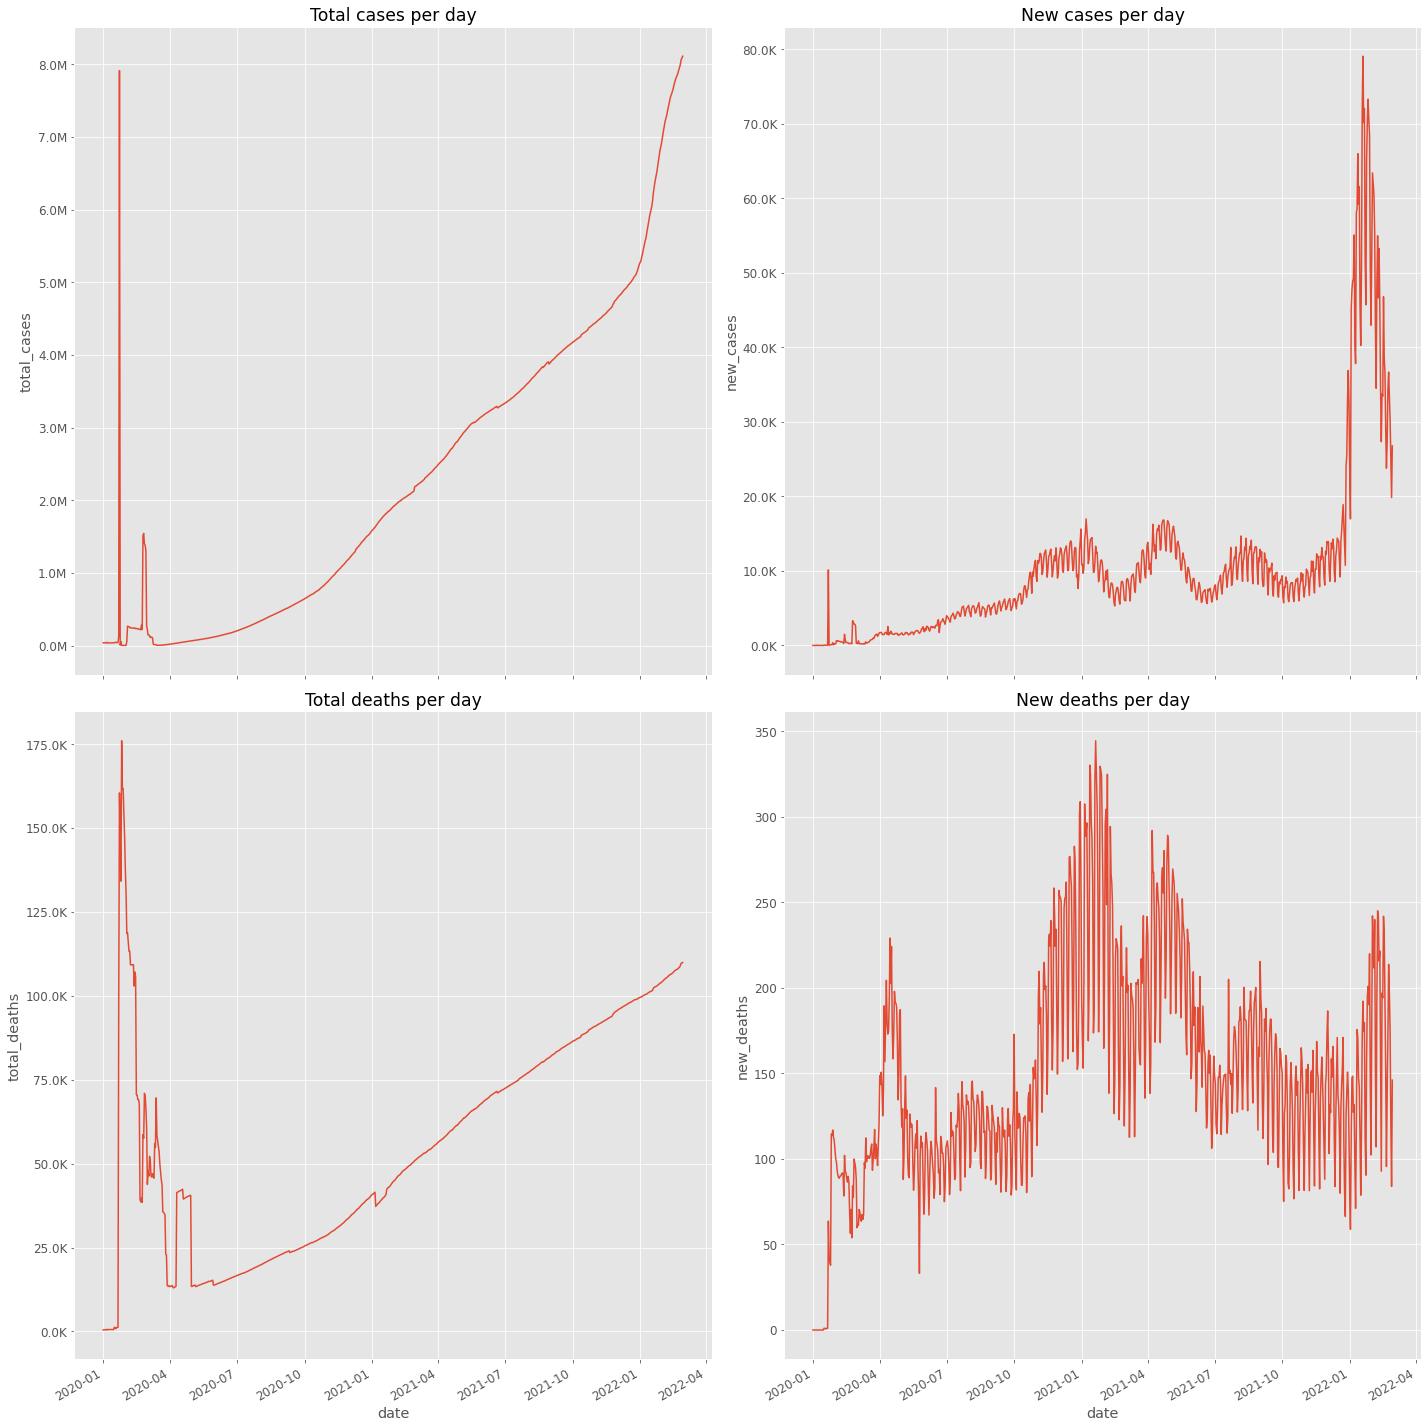

In [37]:
# inititate matplot figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig.autofmt_xdate()

# plot total cases for each day
sns.lineplot(x='date', y='total_cases', data=df_ffill, ci=None, ax=ax1)
ax1.set(title='Total cases per day')
ax1.yaxis.set_major_formatter(format_mill)

# plot new cases for each day
sns.lineplot(x='date', y='new_cases', data=df_ffill, ci=None, ax=ax2)
ax2.set(title='New cases per day')
ax2.yaxis.set_major_formatter(format_tsd)

# plot total deaths for each day
sns.lineplot(x='date', y='total_deaths', data=df_ffill, ci=None, ax=ax3)
ax3.set(title='Total deaths per day')
ax3.yaxis.set_major_formatter(format_tsd)

# plot new deaths for each day
sns.lineplot(x='date', y='new_deaths', data=df_ffill, ci=None, ax=ax4)
ax4.set(title='New deaths per day')

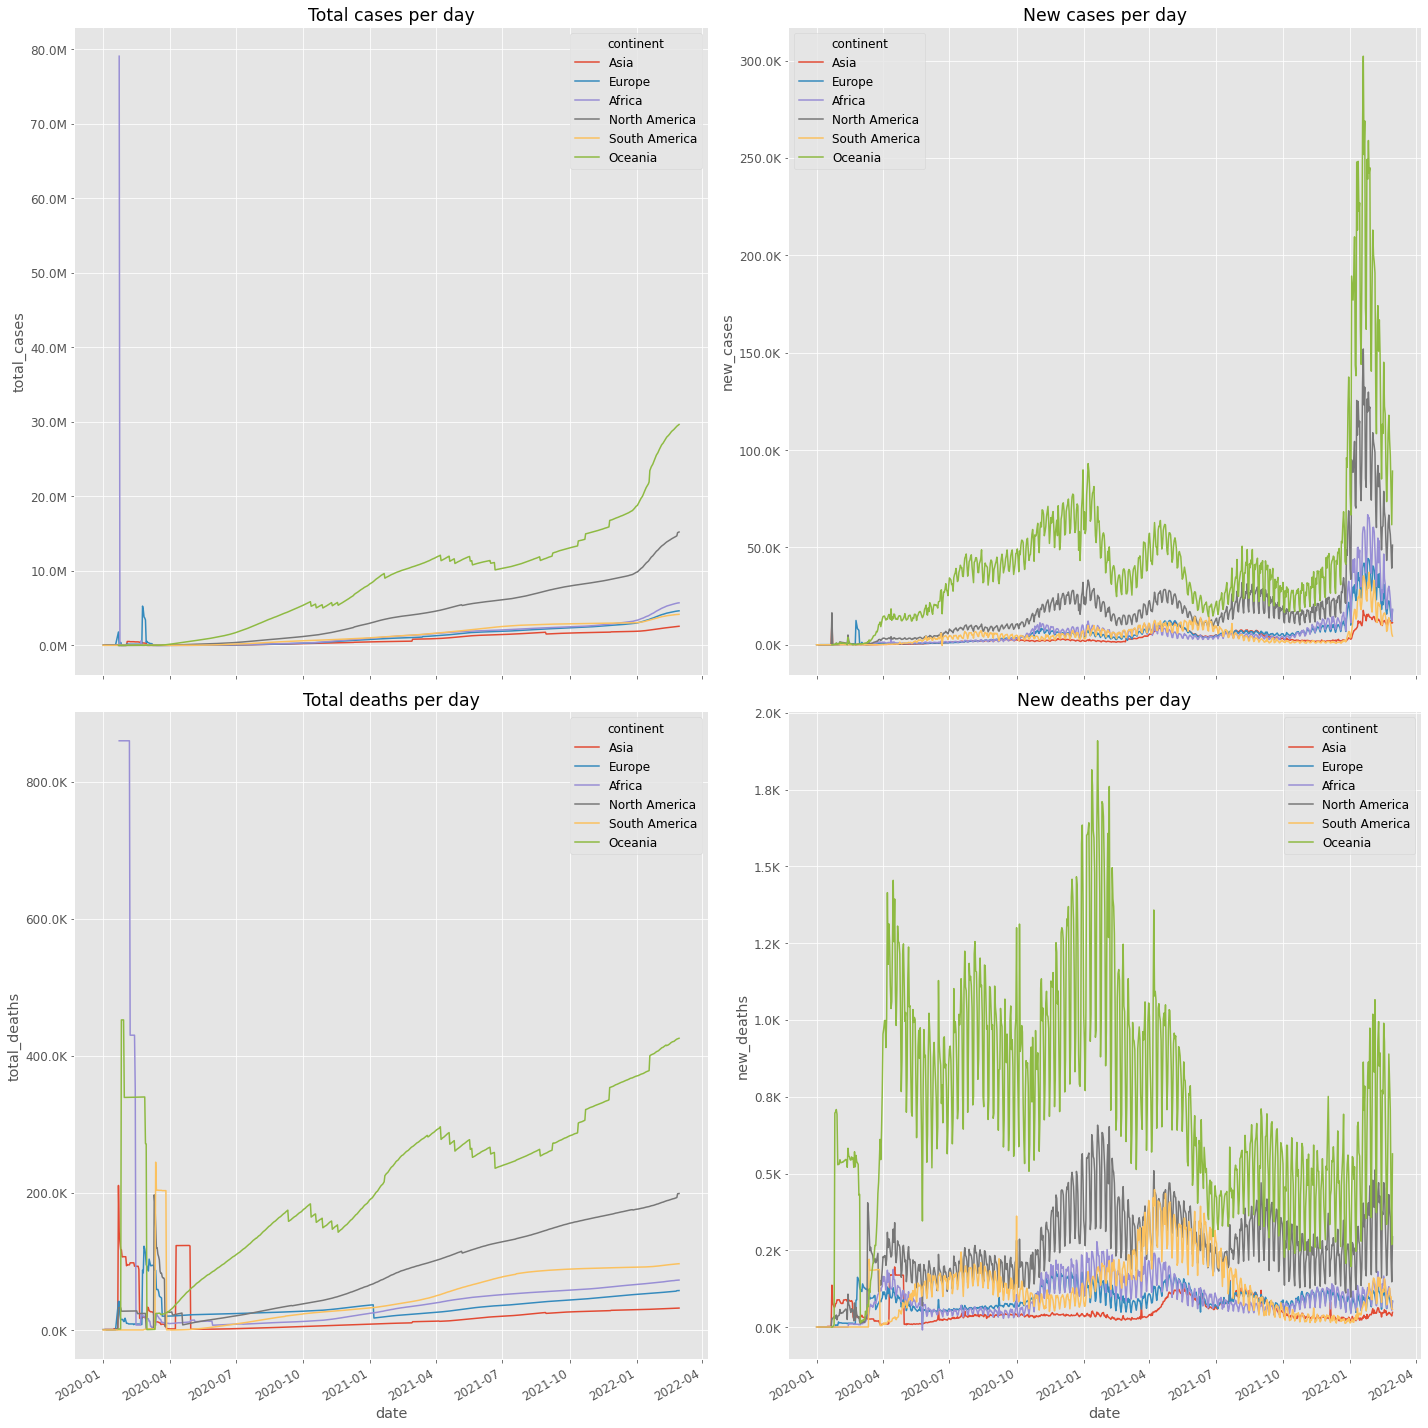

In [38]:
# inititate matplot figure
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig1.autofmt_xdate()

# plot total cases for each day
sns.lineplot(x='date', y='total_cases', data=df_ffill, ci=None, ax=ax1, hue='continent')
ax1.set(title='Total cases per day')
ax1.yaxis.set_major_formatter(format_mill)

# plot new cases for each day
sns.lineplot(x='date', y='new_cases', data=df_ffill, ci=None, ax=ax2, hue='continent')
ax2.set(title='New cases per day')
ax2.yaxis.set_major_formatter(format_tsd)

# plot total deaths for each day
sns.lineplot(x='date', y='total_deaths', data=df_ffill, ci=None, ax=ax3, hue='continent')
ax3.set(title='Total deaths per day')
ax3.yaxis.set_major_formatter(format_tsd)

# plot new deaths for each day
sns.lineplot(x='date', y='new_deaths', data=df_ffill, ci=None, ax=ax4, hue='continent')
ax4.set(title='New deaths per day')
ax4.yaxis.set_major_formatter(format_tsd)

# Date Resampling

Convert time series to weekly frequency

[Text(0.5, 1.0, 'New deaths per week')]

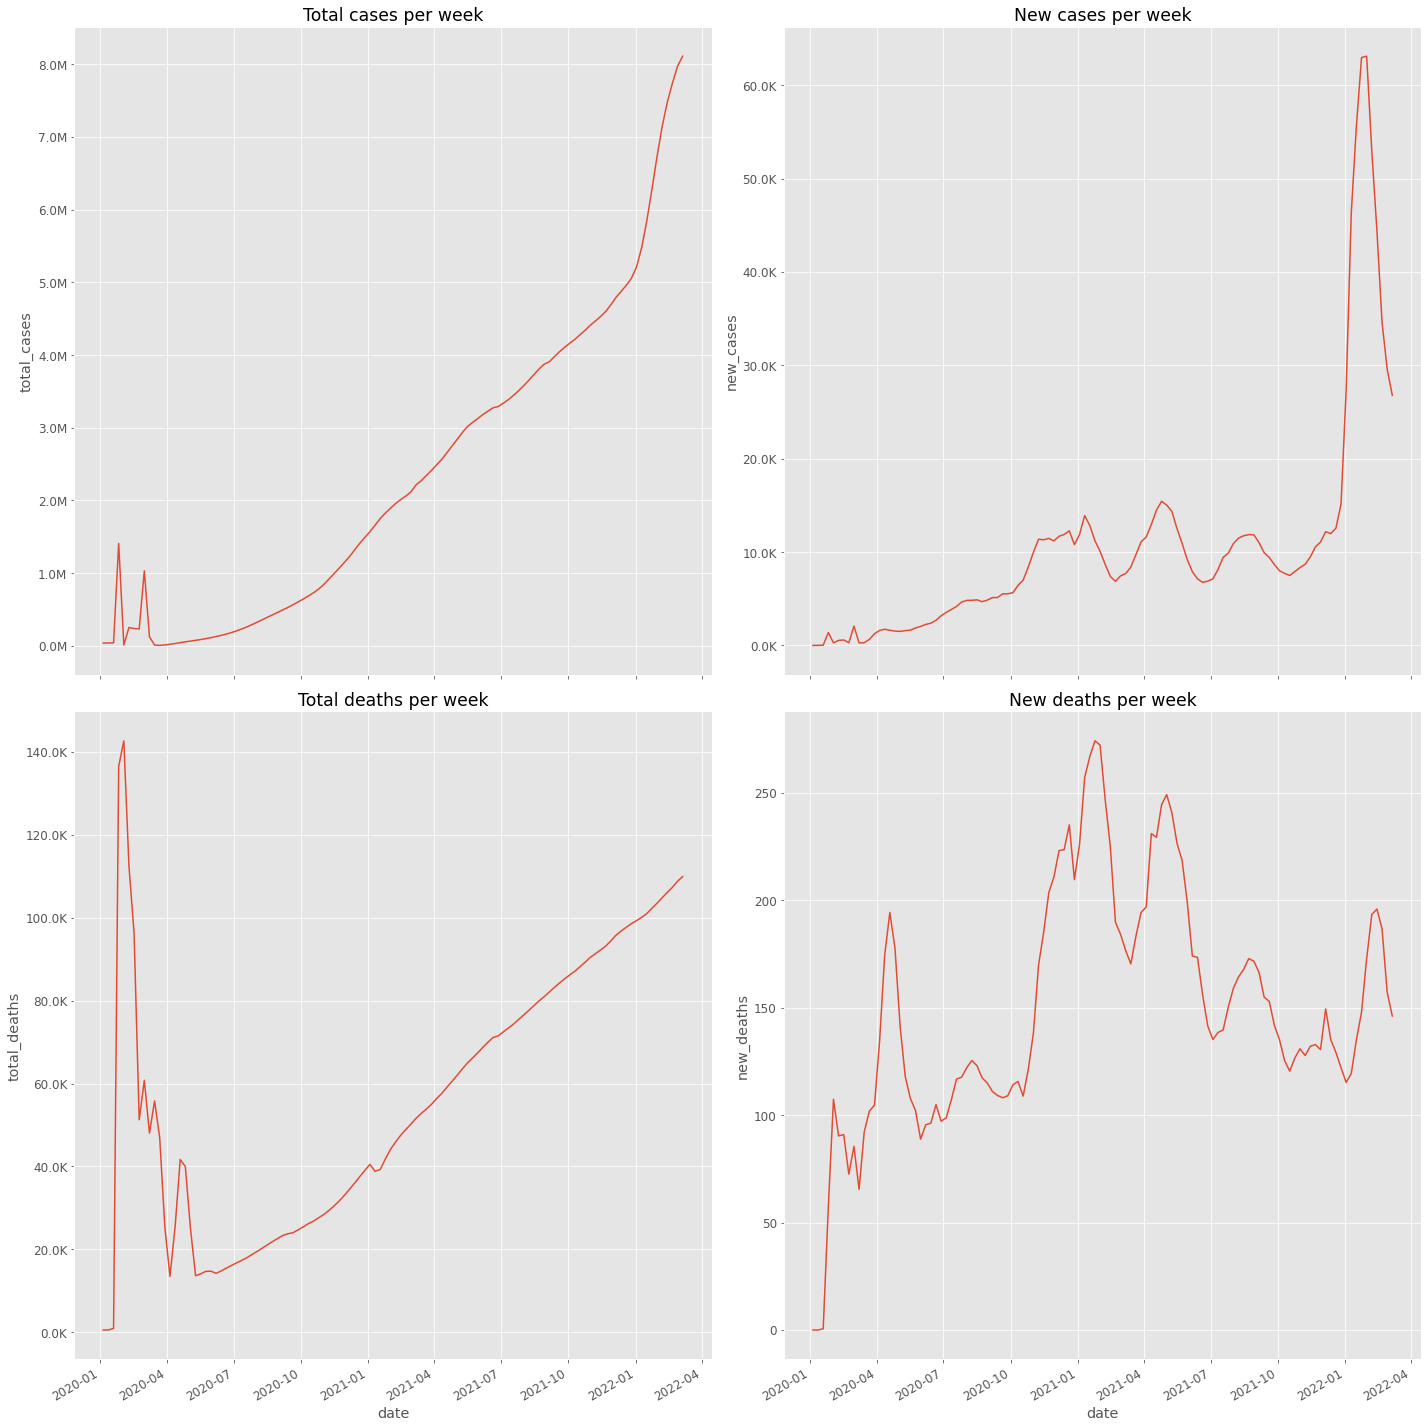

In [39]:
# inititate matplot figure
fig2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig2.autofmt_xdate()

# plot total cases for each week
sns.lineplot(x='date', y='total_cases', data=df_ffill.set_index('date').resample('W').mean(), ci=None, ax=ax1)   
ax1.set(title='Total cases per week')
ax1.yaxis.set_major_formatter(format_mill)

# plot new cases for each week
sns.lineplot(x='date', y='new_cases', data=df_ffill.set_index('date').resample('W').mean(), ci=None, ax=ax2)    
ax2.set(title='New cases per week')
ax2.yaxis.set_major_formatter(format_tsd)

# plot total deaths for each week
sns.lineplot(x='date', y='total_deaths', data=df_ffill.set_index('date').resample('W').mean(), ci=None, ax=ax3)
ax3.set(title='Total deaths per week')
ax3.yaxis.set_major_formatter(format_tsd)

# plot new deaths for each week
sns.lineplot(x='date', y='new_deaths', data=df_ffill.set_index('date').resample('W').mean(), ci=None, ax=ax4)
ax4.set(title='New deaths per week')

Convert time series to calendar month begin frequency

[Text(0.5, 1.0, 'New deaths at calendar month begin')]

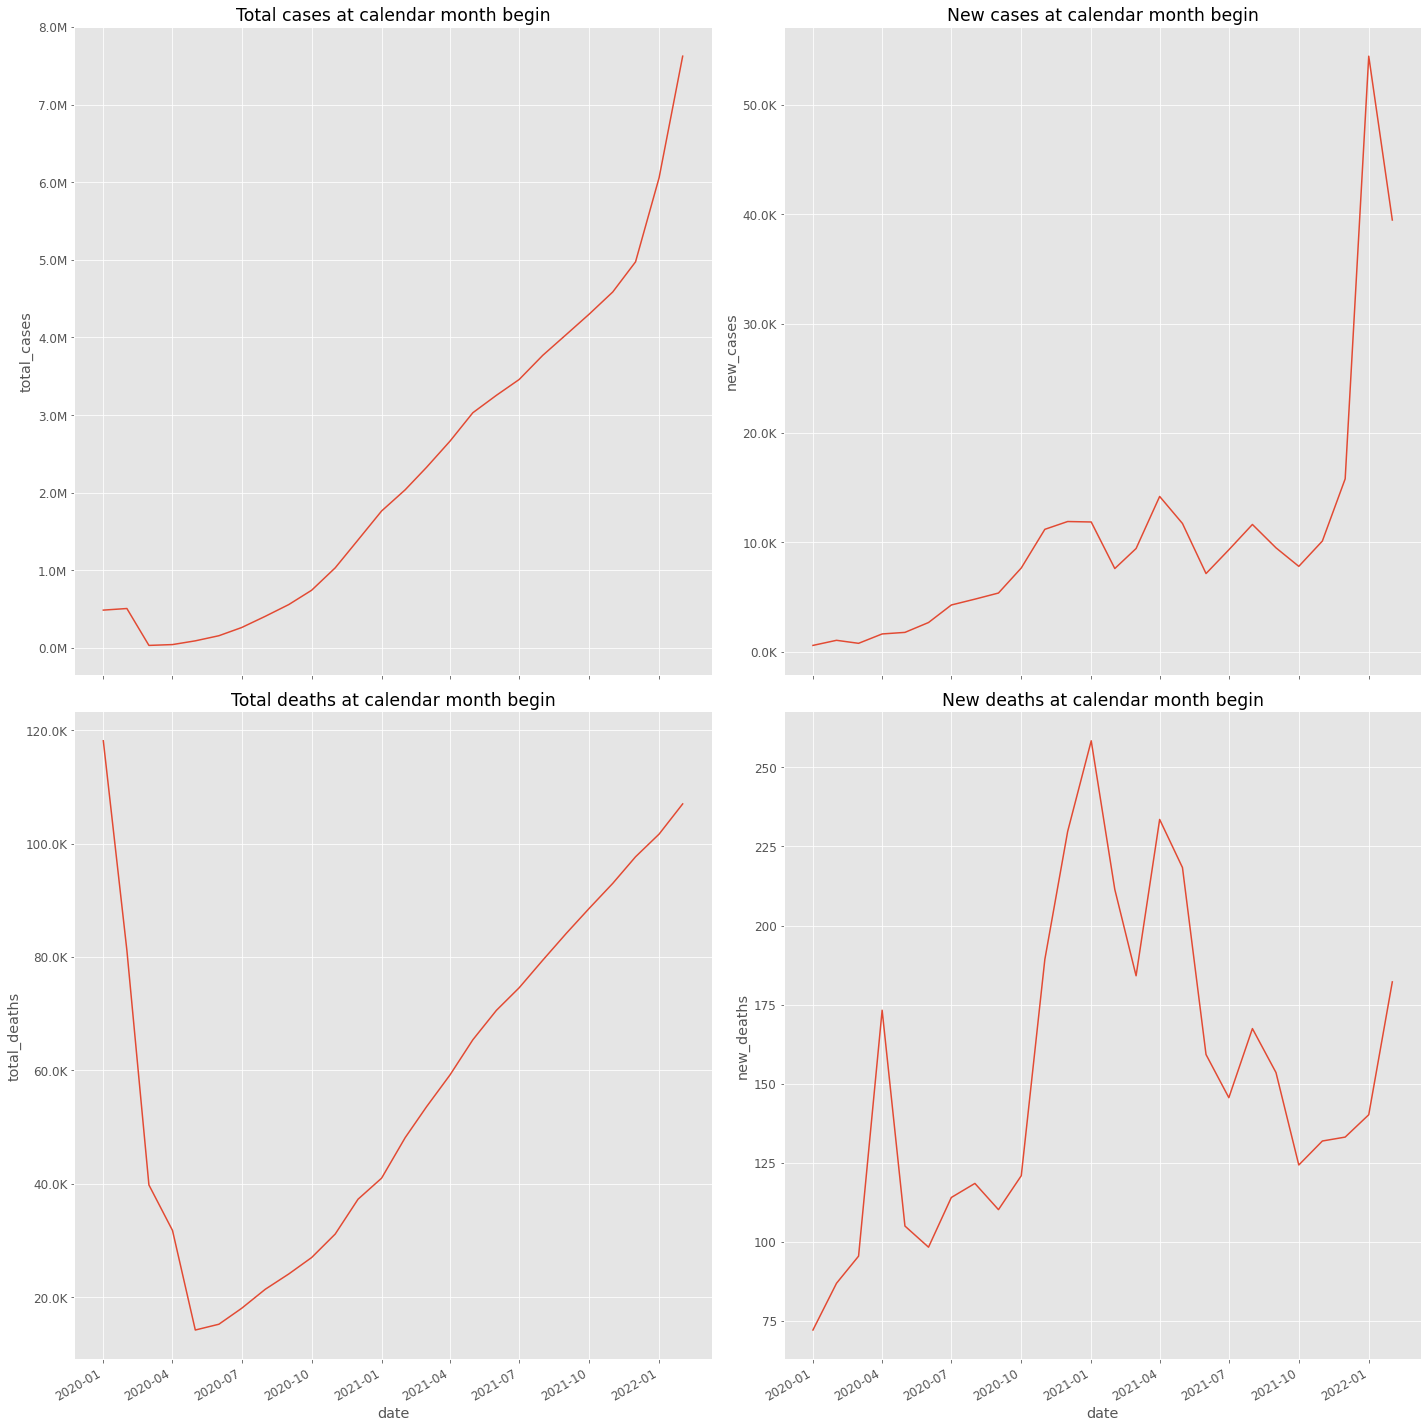

In [40]:
# inititate matplot figure
fig3, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig3.autofmt_xdate()

# plot total cases at the beginning of each month
sns.lineplot(x='date', y='total_cases', data=df_ffill.set_index('date').resample('MS').mean(), ci=None, ax=ax1)   
ax1.set(title='Total cases at calendar month begin')
ax1.yaxis.set_major_formatter(format_mill)

# plot new cases at the beginning of each month
sns.lineplot(x='date', y='new_cases', data=df_ffill.set_index('date').resample('MS').mean(), ci=None, ax=ax2)   
ax2.set(title='New cases at calendar month begin')
ax2.yaxis.set_major_formatter(format_tsd)

# plot total deaths at the beginning of each month
sns.lineplot(x='date', y='total_deaths', data=df_ffill.set_index('date').resample('MS').mean(), ci=None, ax=ax3)   
ax3.set(title='Total deaths at calendar month begin')
ax3.yaxis.set_major_formatter(format_tsd)

# plot new deaths at the beginning of each month
sns.lineplot(x='date', y='new_deaths', data=df_ffill.set_index('date').resample('MS').mean(), ci=None, ax=ax4)   
ax4.set(title='New deaths at calendar month begin')

Convert time series to 15th (or other day_of_month) and calendar month end frequency

[Text(0.5, 1.0, 'New deaths at SemiMonthEnd')]

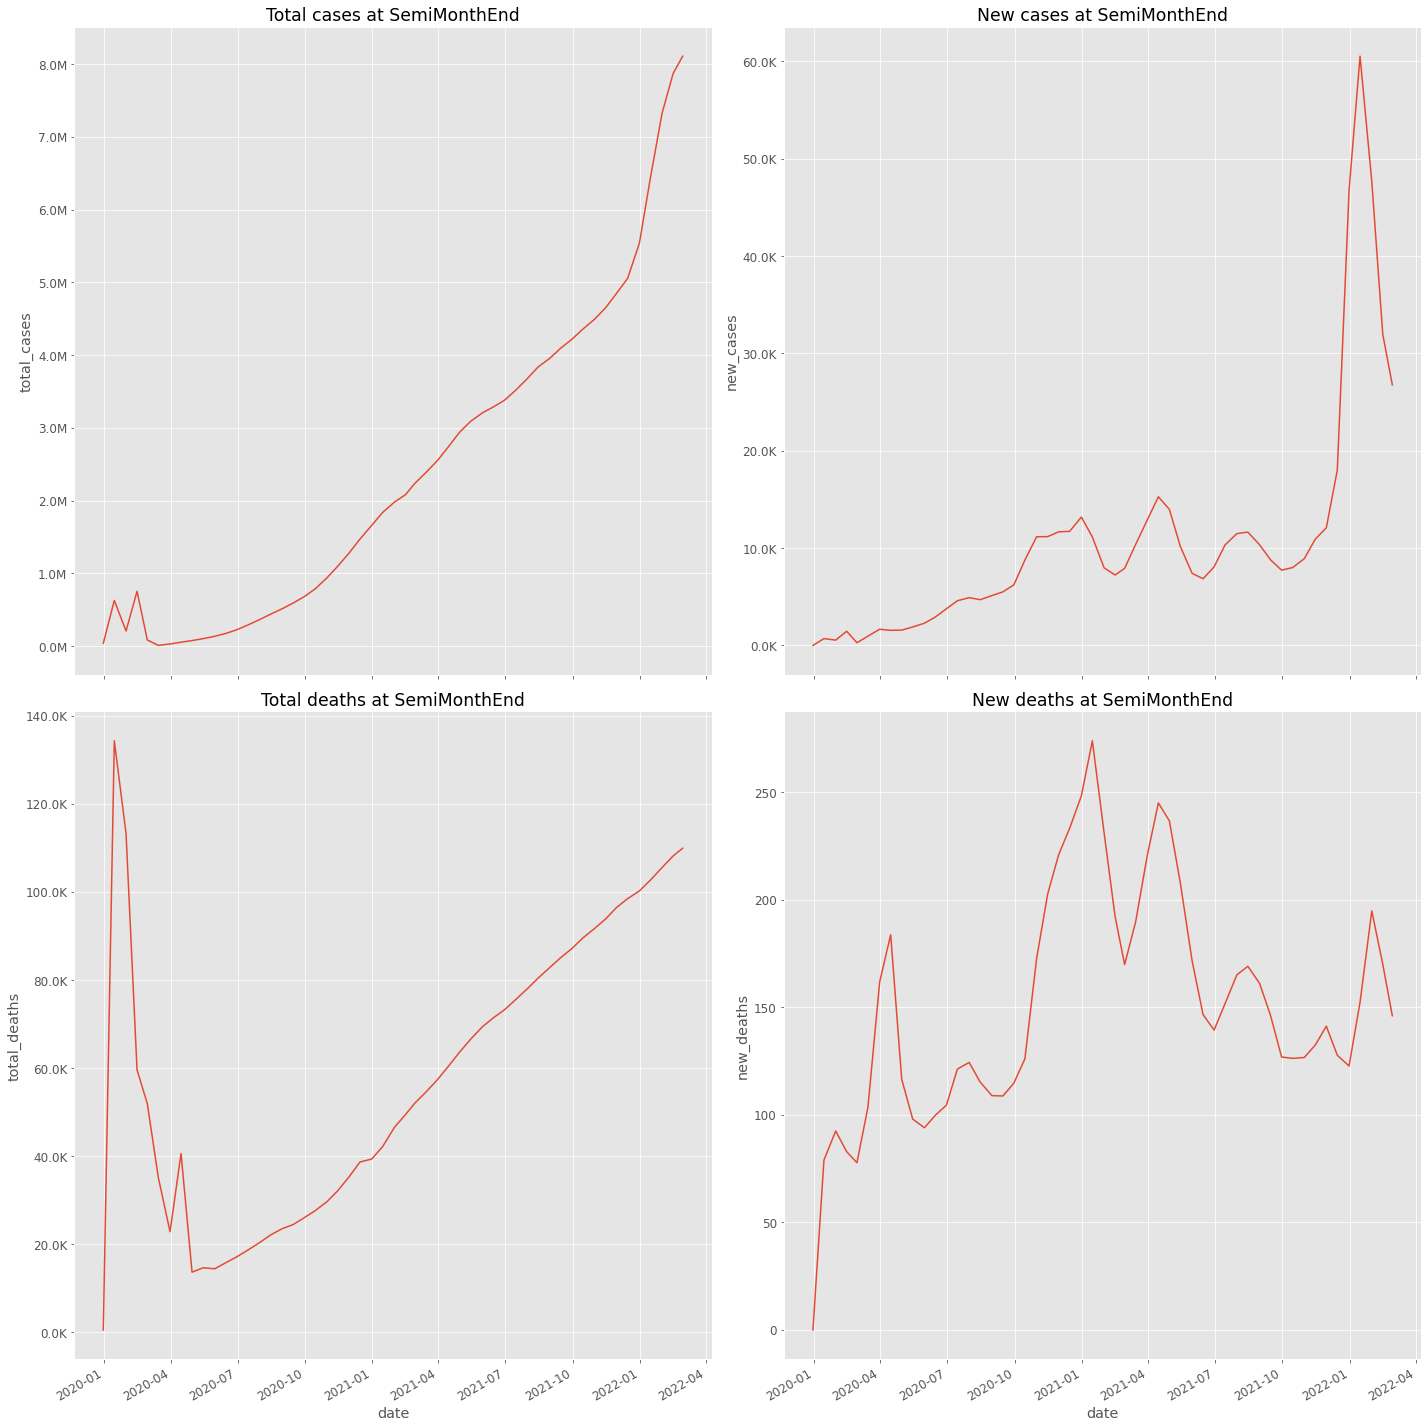

In [41]:
# inititate matplot figure
fig4, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig4.autofmt_xdate()

# plot total cases at 15th (or other day_of_month) and calendar month
sns.lineplot(x='date', y='total_cases', data=df_ffill.set_index('date').resample('SM').mean(), ci=None, ax=ax1)   
ax1.set(title='Total cases at SemiMonthEnd')
ax1.yaxis.set_major_formatter(format_mill)

# plot new cases at 15th (or other day_of_month) and calendar month
sns.lineplot(x='date', y='new_cases', data=df_ffill.set_index('date').resample('SM').mean(), ci=None, ax=ax2)   
ax2.set(title='New cases at SemiMonthEnd')
ax2.yaxis.set_major_formatter(format_tsd)

# plot total deaths at 15th (or other day_of_month) and calendar month
sns.lineplot(x='date', y='total_deaths', data=df_ffill.set_index('date').resample('SM').mean(), ci=None, ax=ax3)   
ax3.set(title='Total deaths at SemiMonthEnd')
ax3.yaxis.set_major_formatter(format_tsd)

# plot new deaths at 15th (or other day_of_month) and calendar month
sns.lineplot(x='date', y='new_deaths', data=df_ffill.set_index('date').resample('SM').mean(), ci=None, ax=ax4)   
ax4.set(title='New deaths at SemiMonthEnd')

Convert time series to calendar quarter begin frequency

[Text(0.5, 1.0, 'New deaths at QuarterBegin')]

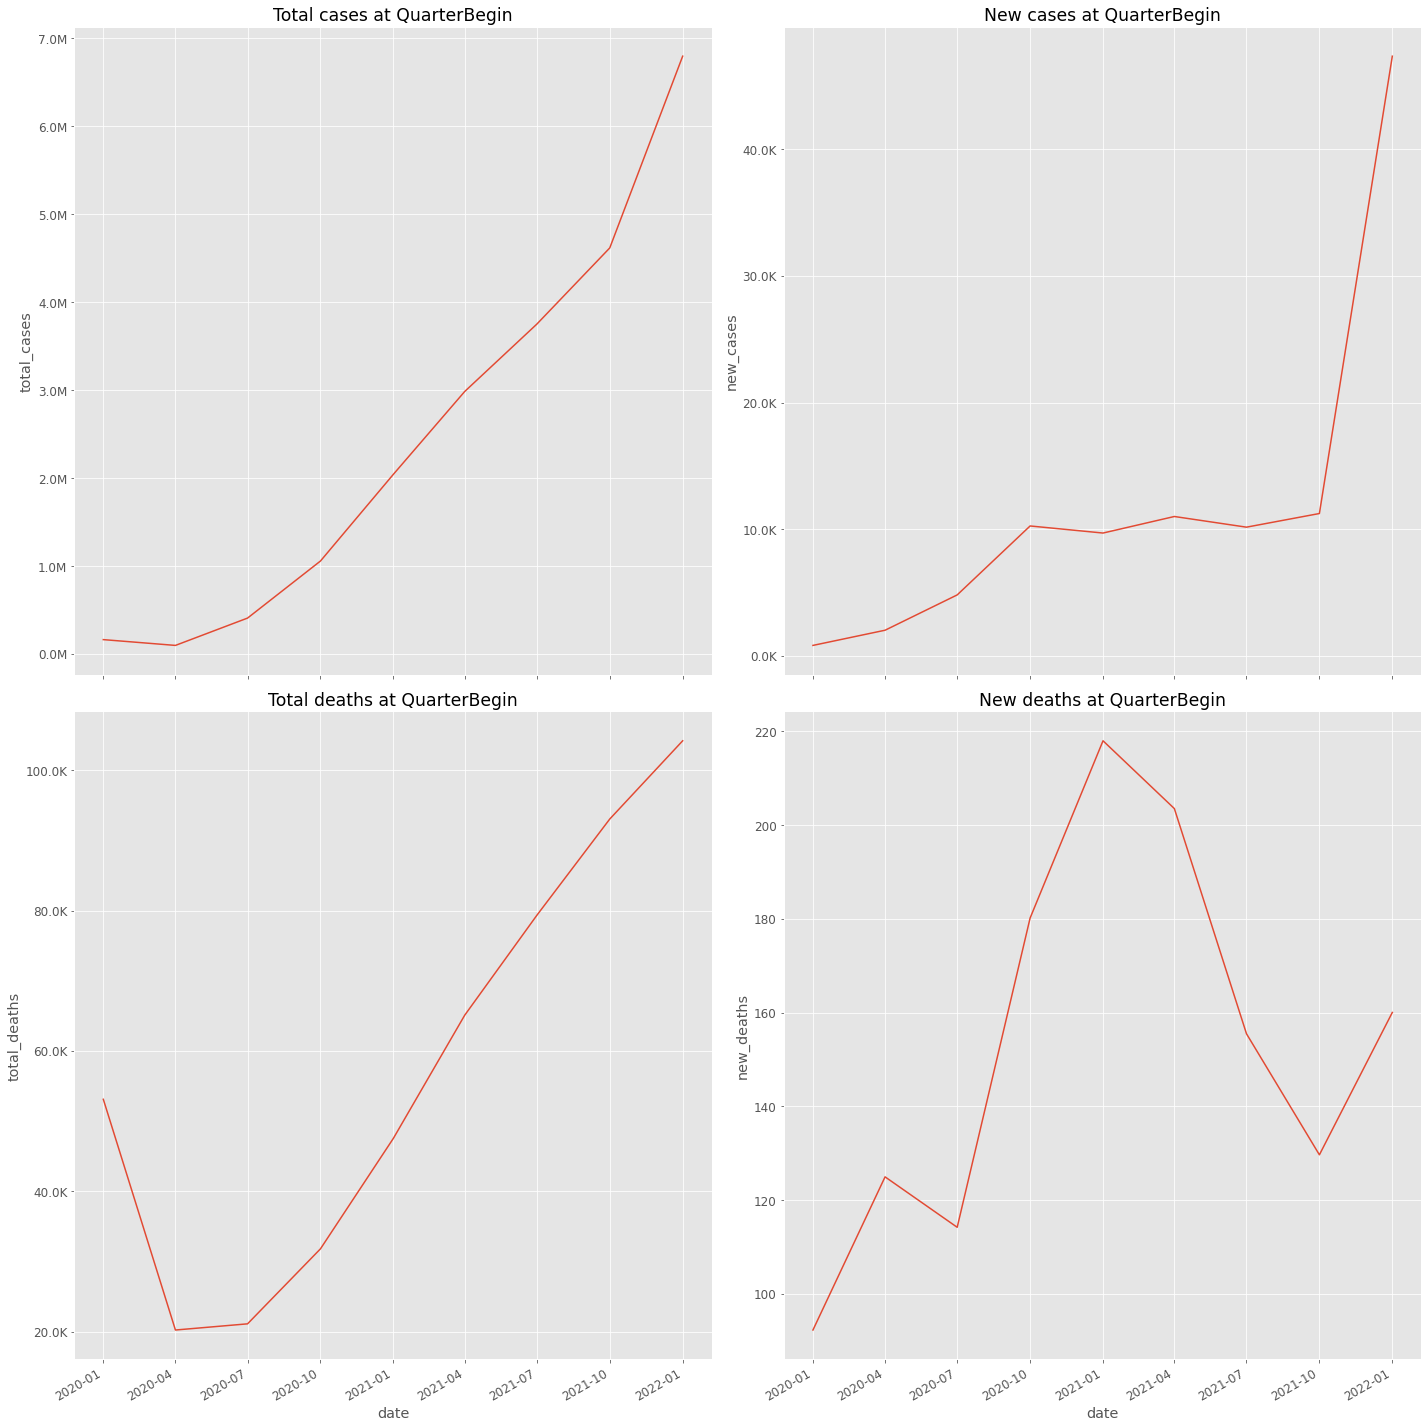

In [42]:
# inititate matplot figure
fig5, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
fig5.autofmt_xdate()

# plot total cases at calendar quarter begin
sns.lineplot(x='date', y='total_cases', data=df_ffill.set_index('date').resample('QS').mean(), ci=None, ax=ax1)   
ax1.set(title='Total cases at QuarterBegin')
ax1.yaxis.set_major_formatter(format_mill)

# plot new cases at calendar quarter begin
sns.lineplot(x='date', y='new_cases', data=df_ffill.set_index('date').resample('QS').mean(), ci=None, ax=ax2)   
ax2.set(title='New cases at QuarterBegin')
ax2.yaxis.set_major_formatter(format_tsd)

# plot total deaths at calendar quarter begin
sns.lineplot(x='date', y='total_deaths', data=df_ffill.set_index('date').resample('QS').mean(), ci=None, ax=ax3)   
ax3.set(title='Total deaths at QuarterBegin')
ax3.yaxis.set_major_formatter(format_tsd)

# plot new deaths at calendar quarter begin
sns.lineplot(x='date', y='new_deaths', data=df_ffill.set_index('date').resample('QS').mean(), ci=None, ax=ax4)   
ax4.set(title='New deaths at QuarterBegin')